In [1]:
import sys
import numpy as np

In [85]:
# def replace_string_with_sum(data, column):
#
#     # characters = []
#     # # Get all the unique characters from the input string
#     all_chars = set("".join(data[column].tolist()))
#
#     # Add the missing characters to the characters list
#     characters = list(set(characters + list(all_chars)))
#     # print(characters)
#
#     char_map = {}
#     for i, char in enumerate(characters):
#         char_map[char] = i + 1
#     print(char_map)
#
#     # Replace the values in the input column with the sum of the values of each character in the string
#     data[column] = data[column].map(lambda x: sum([char_map[c] for c in x]))
#     return data

In [86]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


def tsne_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]
    
    def fashion_scatter(x, colors):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.scatter(x[:,0], x[:,1], c=colors, cmap='rainbow')
        return fig, ax

    colors = target
    RS = 42
    tsne = TSNE(random_state=RS)
    X_tsne = tsne.fit_transform(feature)

    fig, ax = fashion_scatter(X_tsne, colors)
    plt.show()
    

In [88]:
import umap
import matplotlib.pyplot as plt

def umap_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]

    umap_model = umap.UMAP()
    embedding = umap_model.fit_transform(feature)

    plt.figure(figsize=(12, 12))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='Spectral', s=5)
    plt.gca().set_aspect('equal', 'datalim')
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title('UMAP projection of the Digits dataset', fontsize=24)

In [89]:
from sklearn.decomposition import PCA


def PCA_plot(data):
    ncols = data.shape[1]
    feature = data.values[:,0:ncols-1]
    target = data.values[:,ncols-1]

    pca = PCA(n_components=2)
    pca.fit(feature)
    # This should equal the sum of the first two values in the cumulative proportion plot
    print('Explained variance ratio '+ str(pca.explained_variance_ratio_))

    # Project data onto first two principal components
    projX = pca.transform(feature)
    plt.figure(4)

    marks = ('o', '1')
    plt.figure(6)
    for n in range(0, 2, 1) :
        projClass = projX[np.equal(target, n*np.ones(target.shape))]
        plt.plot(projClass[:,0], projClass[:,1], marks[n-1])

    plt.title('Projected data showing target')
    plt.show()


In [4]:
from setup import config
from feature_filter import load_data
from label import generate_label
import feature_filter

config.set_config(config.speciesType.mouse, config.chainType.beta)
data = load_data()
generate_label(data, config.labelType.mhc_class)

fetching data stage
generating label


,cdr3_a_aa,v_a_gene,j_a_gene,cdr3_b_aa,v_b_gene,d.beta,j_b_gene,species,mhc.a,mhc.b,...,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,label
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,0
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,0
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2,0
5,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,TCL culture,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,0
7,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,TCL culture,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59806,CAVYNQGGKLIF,TRAV8-1*01,TRAJ23*01,CASSALVAFSTDTQYF,TRBV6-4*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-A*24:01,B2M,...,NaN,S1208,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAVYNQGGKLIF"", ""cdr3_old"": ""CAVYNQGG...","{""cdr3"": ""CASSALVAFSTDTQYF"", ""cdr3_old"": ""CASS...",1,0
59807,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,CASSSLAGEVNEQFF,TRBV7-2*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*24:01,B2M,...,NaN,S1208,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAVRALYNFNKFYF"", ""cdr3_old"": ""CAVRAL...","{""cdr3"": ""CASSSLAGEVNEQFF"", ""cdr3_old"": ""CASSS...",1,0
59808,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,CASSSYTQRGLDYTGELFF,TRBV27*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-A*24:01,B2M,...,NaN,S1208,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CAVESYNTDKLIF"", ""cdr3_old"": ""CAVESYN...","{""cdr3"": ""CASSSYTQRGLDYTGELFF"", ""cdr3_old"": ""C...",1,0
59810,CLVGENSGGFKTIF,TRAV4*01,TRAJ9*01,NaN,NaN,NaN,NaN,HomoSapiens,HLA-A*24:01,B2M,...,NaN,S1208,PBMC,NaN,NaN,NaN,"{""cdr3"": ""CLVGENSGGFKTIF"", ""cdr3_old"": ""CLVGEN...",NaN,1,0


In [5]:
data = data[['cdr3_b_aa', 'v_b_gene', 'j_b_gene', 'label']]
print(data)

                  cdr3_b_aa    v_b_gene    j_b_gene  label
0      CASSYLPGQGDHYSNQPQHF   TRBV13*01  TRBJ1-5*01      0
2       CASSFEPGQGFYSNQPQHF   TRBV13*01  TRBJ1-5*01      0
4            CASSALASLNEQFF   TRBV14*01  TRBJ2-1*01      0
5      CASSYLPGQGDHYSNQPQHF   TRBV13*01  TRBJ1-5*01      0
7       CASSFEPGQGFYSNQPQHF   TRBV13*01  TRBJ1-5*01      0
...                     ...         ...         ...    ...
59806      CASSALVAFSTDTQYF  TRBV6-4*01  TRBJ2-3*01      0
59807       CASSSLAGEVNEQFF  TRBV7-2*01  TRBJ2-1*01      0
59808   CASSSYTQRGLDYTGELFF   TRBV27*01  TRBJ2-2*01      0
59810                   NaN         NaN         NaN      0
59811     CASSQDYWGGGADTQYF  TRBV4-1*01  TRBJ2-3*01      0

[33329 rows x 4 columns]


In [8]:
# data = replace_string_with_sum(data, 'cdr3_b_aa')
# data = replace_string_with_sum(data, 'v_b_gene')
# data = replace_string_with_sum(data, 'j_b_gene')
from feature_filter import compute_similarity
compute_similarity(data)
print(data)

TypeError: list indices must be integers or slices, not range

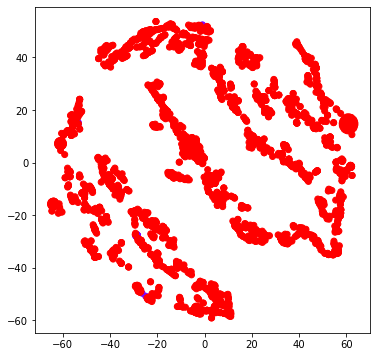

In [109]:
tsne_plot(data)

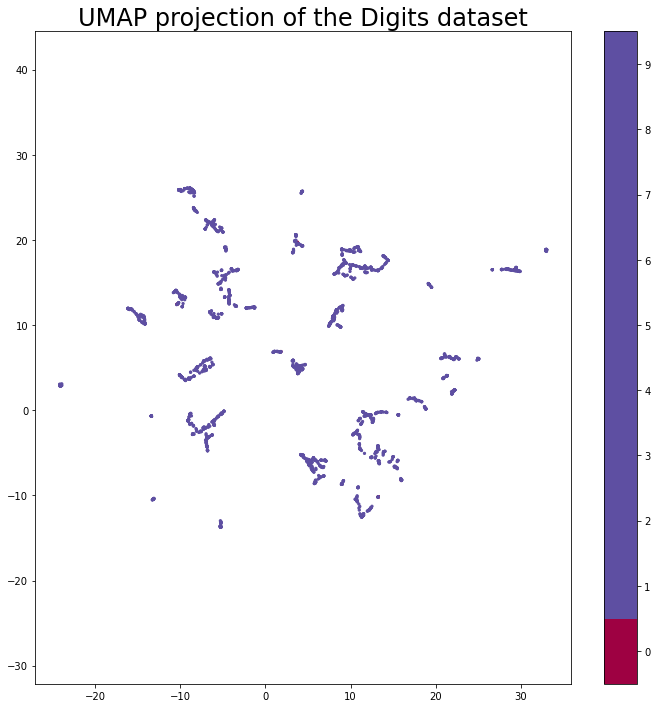

In [110]:
umap_plot(data)

Explained variance ratio [0.77671001 0.20609456]


<Figure size 432x288 with 0 Axes>

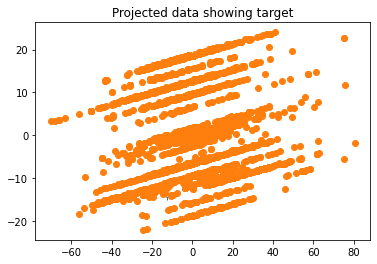

In [111]:
PCA_plot(data)